In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
train = '/mnt/newvolume/DUMP/Notebook/xray_class/data/dataset_4/train'
test = '/mnt/newvolume/DUMP/Notebook/xray_class/data/dataset_4/valid'

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
#Preprocessing

In [4]:
def scale_images(x, y):
    return x / 255, y

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(train, image_size=(256, 256), labels="inferred", label_mode="binary", validation_split=0.2, subset="training",seed=42)
train_data = train_data.map(scale_images)
train_size = int(len(train_data))
train_data_final = train_data.take(train_size)
print(train_size)

Found 8621 files belonging to 2 classes.
Using 6897 files for training.
216


In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(train, image_size=(256, 256), labels="inferred", label_mode="binary", validation_split=0.2, subset="validation", seed=42)
val_data = val_data.map(scale_images)
val_data_final = val_data.take(len(val_data))
print(len(val_data))

Found 8621 files belonging to 2 classes.
Using 1724 files for validation.
54


In [7]:
#The Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(AveragePooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1,activation='sigmoid'))

opt = Adam(learning_rate=0.00001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape = (256,256,3))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 62, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 16)       0

In [12]:
hist = model.fit(train_data_fclass_labels = ["fractured", "not_fractured"]inal, epochs=5, validation_data=val_data_final)

Epoch 1/5
216/216 [==============================] - 32s 132ms/step - loss: 0.5686 - accuracy: 0.7142 - val_loss: 0.4252 - val_accuracy: 0.8619
Epoch 2/5
216/216 [==============================] - 28s 127ms/step - loss: 0.3122 - accuracy: 0.9039 - val_loss: 0.2350 - val_accuracy: 0.9327
Epoch 3/5
216/216 [==============================] - 28s 128ms/step - loss: 0.1913 - accuracy: 0.9371 - val_loss: 0.1437 - val_accuracy: 0.9611
Epoch 4/5
216/216 [==============================] - 28s 127ms/step - loss: 0.1301 - accuracy: 0.9580 - val_loss: 0.0961 - val_accuracy: 0.9768
Epoch 5/5
216/216 [==============================] - 28s 127ms/step - loss: 0.0920 - accuracy: 0.9742 - val_loss: 0.0686 - val_accuracy: 0.9832


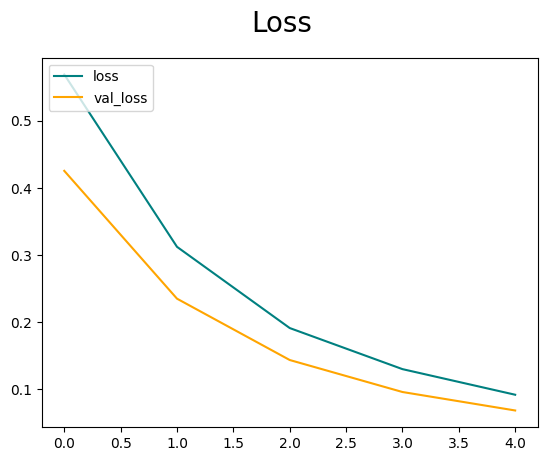

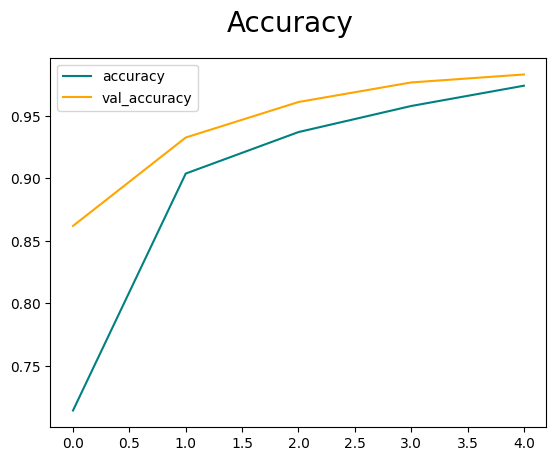

In [13]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Found 8621 files belonging to 2 classes.
Using 1724 files for validation.
1/1 [==============================] - 0s 21ms/step


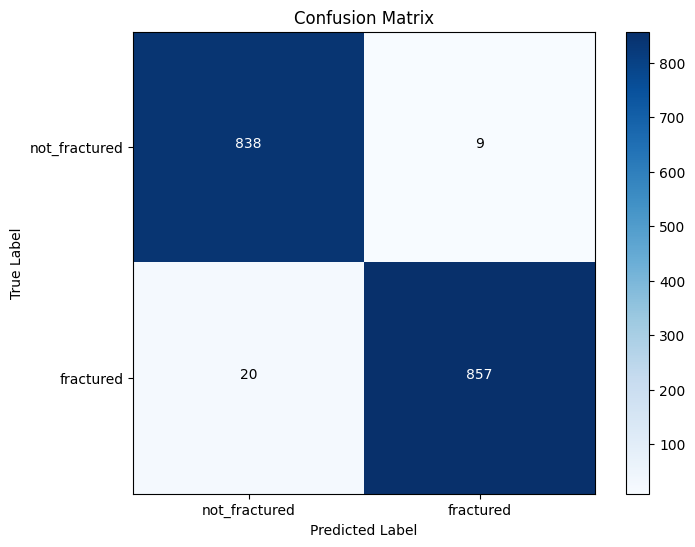

In [25]:
val_data = tf.keras.utils.image_dataset_from_directory(train, image_size=(256, 256), labels="inferred", label_mode="binary", validation_split=0.2, subset="validation", seed=42)
val_data = val_data.map(scale_images)

true_labels = []
predicted_labels = []

threshold = 0.5

for batch in val_data:
    images, labels = batch
    predictions = model.predict(images)
    predicted_labels.extend((predictions > threshold).astype(int))
    true_labels.extend(labels.numpy().astype(int))

confusion = confusion_matrix(true_labels, predicted_labels)

class_labels = ["not_fractured", "fractured"]

# Plot the confusion matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and tick marks
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Display the values in the cells
thresh = confusion.max() / 2.0
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()